In [2]:
import pandas as pd
import numpy as np

# from src.data_processing.load_data import load_data

# m, r = load_data()

movies = pd.read_csv('../data/raw/movies_metadata.csv', low_memory=False)
ratings = pd.read_csv('../data/raw/ratings.csv')

# Understanding the structure

In [3]:
print(movies.info())
print(movies.head(1).transpose())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [4]:
print(ratings.info())
print(ratings.head(1).transpose())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB
None
                      0
userId     1.000000e+00
movieId    1.100000e+02
rating     1.000000e+00
timestamp  1.425942e+09


In [ ]:
movies = movies.drop('imdb_id', axis=1)
movies = movies.drop('original_title', axis=1)

In [17]:
movies[movies['revenue'] == 0].shape
movies['revenue'] = movies.revenue.replace(0, np.nan)

In [19]:
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')
movies['budget'] = movies['budget'].replace(0, np.nan)

In [20]:
movies['return'] = movies['revenue'] / movies['budget']

In [35]:
movies['release_date']
movies['release_year'] = pd.to_datetime(movies['release_date'], errors='coerce').dt.year

In [18]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count'],
      dtype='object')

# Check for missing values

In [25]:
# Check for missing values in movies dataset
print(movies.isnull().sum())

# Check for missing values in ratings dataset
print(ratings.isnull().sum())


adult                        0
belongs_to_collection    40972
budget                   36576
genres                       0
homepage                 37684
id                           0
original_language           11
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                  38058
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
return                   40085
dtype: int64
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


# visualise distributions and relationships

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

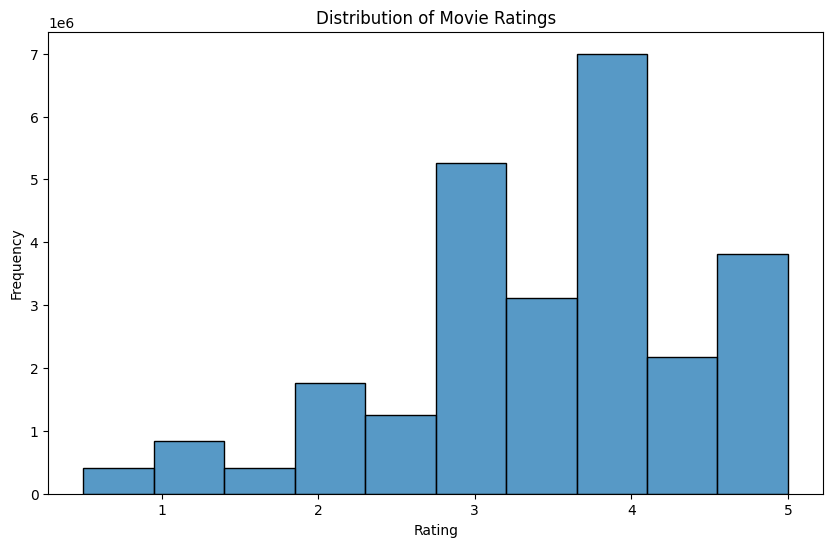

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(ratings['rating'], bins=10, kde=False)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

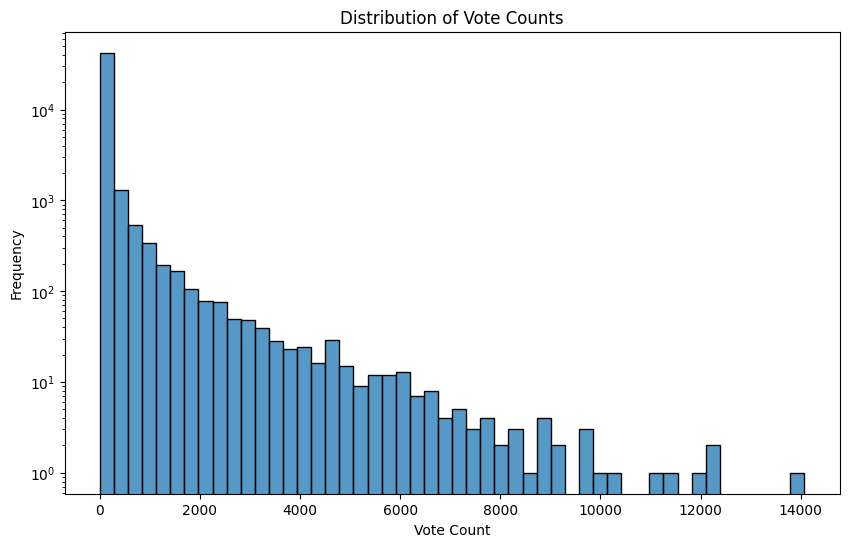

In [30]:
# Distribution of vote counts
plt.figure(figsize=(10, 6))
sns.histplot(movies['vote_count'], bins=50, kde=False)
plt.title('Distribution of Vote Counts')
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

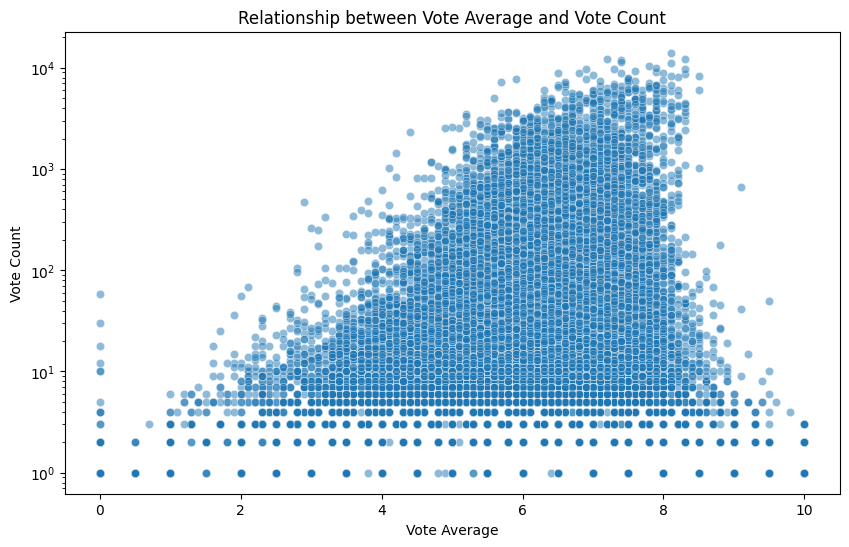

In [31]:
# Relationship between vote_average and vote_count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies, x='vote_average', y='vote_count', alpha=0.5)
plt.title('Relationship between Vote Average and Vote Count')
plt.xlabel('Vote Average')
plt.ylabel('Vote Count')
plt.yscale('log')
plt.show()

# Identify DataQuality Issues

In [32]:
# Check for duplicates in movies dataset
print(movies.duplicated(subset=['id', 'title']).sum())

# Check for duplicates in ratings dataset
print(ratings.duplicated(subset=['userId', 'movieId']).sum())

# Check for outliers in ratings
print(ratings.describe())


30
0
             userId       movieId        rating     timestamp
count  2.602429e+07  2.602429e+07  2.602429e+07  2.602429e+07
mean   1.350371e+05  1.584911e+04  3.528090e+00  1.171258e+09
std    7.817620e+04  3.108526e+04  1.065443e+00  2.052889e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    6.716400e+04  1.073000e+03  3.000000e+00  9.907545e+08
50%    1.351630e+05  2.583000e+03  3.500000e+00  1.151716e+09
75%    2.026930e+05  6.503000e+03  4.000000e+00  1.357578e+09
max    2.708960e+05  1.762750e+05  5.000000e+00  1.501830e+09


In [34]:
# Keep the record with the highest vote count for each duplicate
movies = movies.sort_values('vote_count', ascending=False).drop_duplicates(subset=['id', 'title'], keep='first')